In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


In [3]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar fluo4- EGTA

/Users/austinmcdonald/Desktop/data/Fluo4/8-11-16/Ar Fluo4- EGTA


In [4]:
os.listdir()

['CCD-noise.csv', 'EGTA-0.csv', 'EGTA-100.csv', 'EGTA-150.csv', 'EGTA-50.csv']

In [5]:
backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','back'],skiprows=33,skipfooter=1,engine='python')
bapta0 = pd.read_csv('EGTA-0.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta50 = pd.read_csv('EGTA-50.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta100 = pd.read_csv('EGTA-100.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta150 = pd.read_csv('EGTA-150.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [6]:
bapta0['dif'] = bapta0['sig'].diff().abs()
bapta0['BS'] = bapta0['sig']-backg['back']

bapta50['dif'] = bapta50['sig'].diff().abs()
bapta50['BS'] = bapta50['sig']-backg['back']

bapta100['dif'] = bapta100['sig'].diff().abs()
bapta100['BS'] = bapta100['sig']-backg['back']

bapta150['dif'] = bapta150['sig'].diff().abs()
bapta150['BS'] = bapta150['sig']-backg['back']


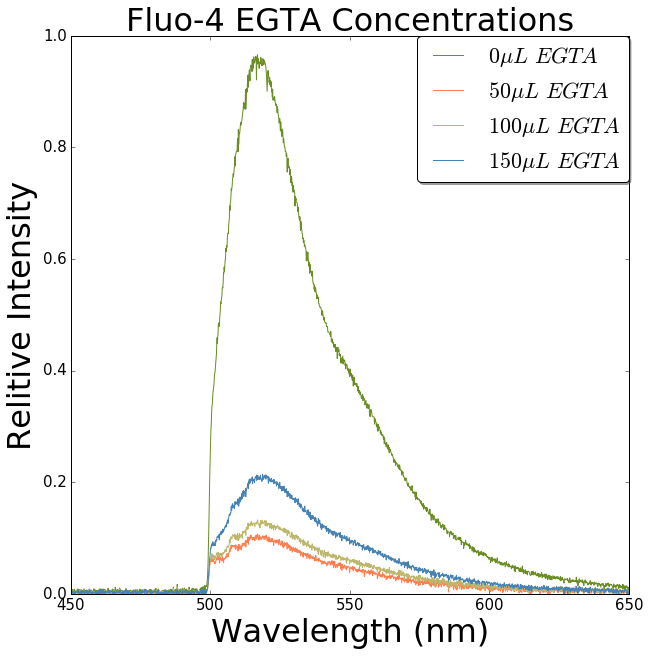

In [20]:
plt.figure(figsize=(10,10))

bapta0f = bapta0[bapta0['dif']<.05]
bapta150f = bapta150[bapta150['dif']<.1]
bapta50f = bapta50[bapta50['dif']<.1]
bapta100f = bapta100[bapta100['dif']<.1]



plt.plot(bapta0f['wave'],bapta0f['BS'],color='olivedrab',label=r'$0 \mu L$ $EGTA$')
plt.plot(bapta50f['wave'],bapta50f['BS'],color='coral',label=r'$50 \mu L$ $EGTA$')
plt.plot(bapta100f['wave'],bapta100f['BS'],color='darkkhaki',label=r'$100 \mu L$ $EGTA$')
plt.plot(bapta150f['wave'],bapta150f['BS'],color='steelblue',label=r'$150 \mu L$ $EGTA$')

#plt.text(600, .65, r'$\frac{F_{max}}{F_{min}} = 12.57$', fontsize=25)

plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Fluo-4 EGTA Concentrations', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(450,650)
plt.ylim(0,1)
#plt.savefig('Ar_Fluo4_EGTA.pdf')

plt.show()